In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [1158]:
from dtcwt_classifier import DtcwtClassifier
from keras.datasets import mnist
import numpy

(X_train, y_train), (X_test, y_test) = mnist.load_data()

cls = DtcwtClassifier(m = 2)
cls.fit(X_train[0:2000], y_train[0:2000])

In [1159]:
accuracy = cls.evaluate(X_test[0:1000], y_test[0:1000])
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 96.60


# Visualization

In [1160]:
def resize(x):
    current_size = len(x)
    new_size = 2 ** (int(np.log2(current_size)) + 1)
    return np.pad(
        x,
        pad_width=int((new_size - current_size) / 2),
        mode="constant",
        constant_values=0,
    )

In [1161]:
import random
import numpy as np

def choose_random_feature(layers, layer):
    idx = np.where(layers==layer)[0]
    return random.sample(idx.tolist(), 1)[0]

def estimate_activation(feature_im):
    activation = 0
    for i in range(feature_im.shape[0]):
        for j in range(feature_im.shape[1]):
            activation += abs(feature_im[i, j])
    return activation

def find_max_activations(images, layer, n_images=1):
    transform = dtcwt_scattering_2d.DtcwtScattering2D()
    feature_id = -1
    activations = dict()
    for i in range(len(images)):
        X = images[i]
        scat = transform.transform(np.asarray(X), m=2, enableReconstruction=True)
        if feature_id < 0:
            feature_id = choose_random_feature(transform.get_scat_layers(), layer)
            print("Chosen feature for layer "+ str(layer) + ": "+ str(feature_id))
        
        feature_im = transform.inverse(scat, feature_id)
        activation = estimate_activation(feature_im)
        
        if len(activations) < n_images:
            activations[activation] = feature_im
        else:
            min_key = min(activations.keys())
            if min_key < activation:
                del activations[min_key]
                activations[activation] = feature_im
    return list(activations.values())

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [1166]:
from dtcwt_scattering import dtcwt_scattering_2d
from keras.datasets import cifar10
from matplotlib import pyplot
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
images = []
y = 1
i = 0
j = 0
while i != 40:
    if y_train[j] == 1:
        images.append(rgb2gray(X_train[i]))
        i += 1
    j += 1

In [1167]:
def find_features_and_show(images, layer):
    results = find_max_activations(images, layer=layer, n_images=4)
    w=10
    h=10
    fig = pyplot.figure(figsize=(7, 7))
    columns = 2
    rows = 2
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        pyplot.imshow(abs(results[i-1]))
    pyplot.show()

Chosen feature for layer 0: 0


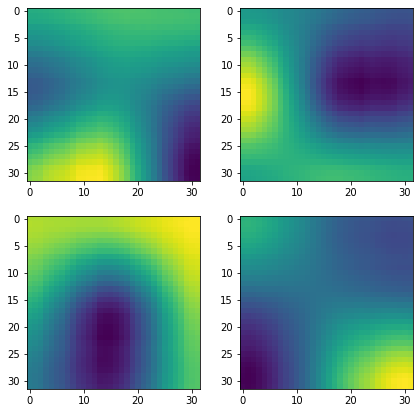

In [1170]:
find_features_and_show(images, 0)

Chosen feature for layer 1: 86


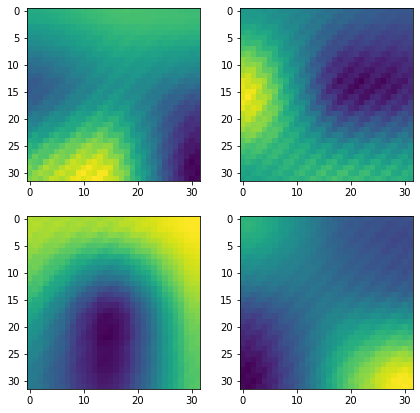

Chosen feature for layer 1: 114


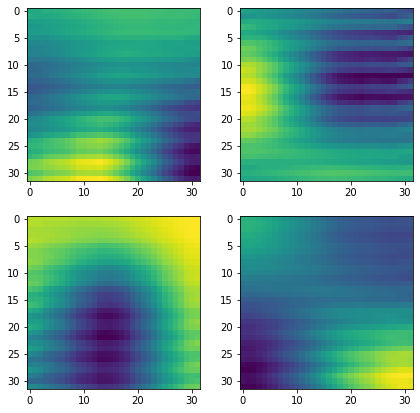

In [1171]:
find_features_and_show(images, 1)
find_features_and_show(images, 1)

Chosen feature for layer 2: 98


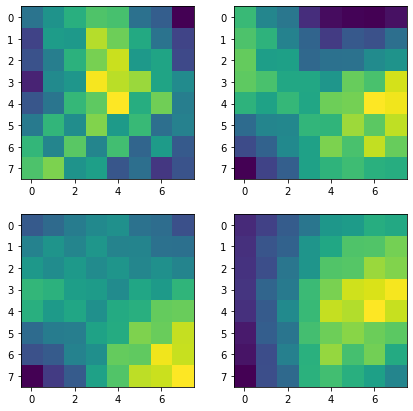

Chosen feature for layer 2: 12


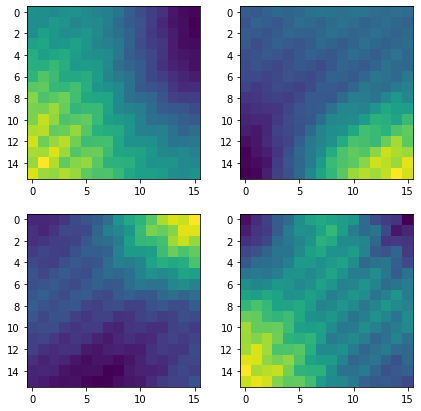

In [1172]:
find_features_and_show(images, 2)
find_features_and_show(images, 2)